In [1]:
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#!pip install xlsxwriter

In [2]:
# Сформируем датафрейм с созданными мероприятиями
engine = create_engine('mysql+mysqlconnector://come_on_dude')

# Сделаем SQL-запрос к БД
query = """SELECT events_1.event_id,
                  events_1.created_date,
                  events_1.name,
                  events_1.format,
                  events_1.city,
                  events_1.price,
                  bookings.quantity_bookings,
                  tags.directions
             # таблица с мероприятиями
             FROM (SELECT id AS event_id,
                          DATE(createdAt) AS created_date,
                          name,
                          format,
                          price,
                          CASE
                            WHEN INSTR(LOWER(name), 'Москва') > 0 OR INSTR(LOWER(location), 'Москва') > 0 THEN 'Москва'
                            WHEN INSTR(LOWER(name), 'Мск') > 0 OR INSTR(LOWER(location), 'Мск') > 0 THEN 'Москва'
                            WHEN INSTR(LOWER(name), 'Санкт-Петербург') > 0 OR INSTR(LOWER(location), 'Санкт-Петербург') > 0 THEN 'Санкт-Петербург'
                            WHEN INSTR(LOWER(name), 'Спб') > 0 OR INSTR(LOWER(location), 'Спб') > 0 THEN 'Санкт-Петербург'
                            WHEN INSTR(LOWER(name), 'Санкт - Петербург') > 0 OR INSTR(LOWER(location), 'Санкт - Петербург') > 0 THEN 'Санкт-Петербург'
                            WHEN INSTR(LOWER(name), 'Санкт - Петербург') > 0 OR INSTR(LOWER(location), 'Санкт - Петербург') > 0 THEN 'Санкт-Петербург'
                            WHEN INSTR(LOWER(name), 'Санкт- Петербург') > 0 OR INSTR(LOWER(location), 'Санкт- Петербург') > 0 THEN 'Санкт-Петербург'
                            WHEN INSTR(LOWER(name), 'Санкт') > 0 OR INSTR(LOWER(location), 'Санкт') > 0 THEN 'Санкт-Петербург'
                            WHEN INSTR(LOWER(name), 'Новосибирск') > 0 OR INSTR(LOWER(location), 'Новосибирск') > 0 THEN 'Новосибирск'
                            WHEN INSTR(LOWER(name), 'Новосиб') > 0 OR INSTR(LOWER(location), 'Новосиб') > 0 THEN 'Новосибирск'
                            WHEN INSTR(LOWER(name), 'Нск') > 0 OR INSTR(LOWER(location), 'Нск') > 0 THEN 'Новосибирск'
                            WHEN INSTR(LOWER(name), 'Екатеринбург') > 0 OR INSTR(LOWER(location), 'Екатеринбург') > 0 THEN 'Екатеринбург'
                            WHEN INSTR(LOWER(name), 'Нижний Новгород') > 0 OR INSTR(LOWER(location), 'Нижний Новгород') > 0 THEN 'Нижний Новгород'
                            WHEN INSTR(LOWER(name), 'Нижний-Новгород') > 0 OR INSTR(LOWER(location), 'Нижний-Новгород') > 0 THEN 'Нижний Новгород'
                            WHEN INSTR(LOWER(name), 'Нижний - Новгород') > 0 OR INSTR(LOWER(location), 'Нижний - Новгород') > 0 THEN 'Нижний Новгород'
                            WHEN INSTR(LOWER(name), 'Самара') > 0 OR INSTR(LOWER(location), 'Самара') > 0 THEN 'Самара'
                            WHEN INSTR(LOWER(name), 'Казань') > 0 OR INSTR(LOWER(location), 'Казань') > 0 THEN 'Казань'
                            WHEN INSTR(LOWER(name), 'Омск') > 0 OR INSTR(LOWER(location), 'Омск') > 0 THEN 'Омск'
                            WHEN INSTR(LOWER(name), 'Челябинск') > 0 OR INSTR(LOWER(location), 'Челябинск') > 0 THEN 'Челябинск'
                            WHEN INSTR(LOWER(name), 'Ростов-на-Дону') > 0 OR INSTR(LOWER(location), 'Ростов-на-Дону') > 0 THEN 'Ростов-на-Дону'
                            WHEN INSTR(LOWER(name), 'Ростов на Дону') > 0 OR INSTR(LOWER(location), 'Ростов на Дону') > 0 THEN 'Ростов-на-Дону'
                            WHEN INSTR(LOWER(name), 'Ростов') > 0 OR INSTR(LOWER(location), 'Ростов') > 0 THEN 'Ростов-на-Дону'
                            WHEN INSTR(LOWER(name), 'Уфа') > 0 OR INSTR(LOWER(location), 'Уфа') > 0 THEN 'Уфа'
                            WHEN INSTR(LOWER(name), 'Пермь') > 0 OR INSTR(LOWER(location), 'Пермь') > 0 THEN 'Пермь'
                            WHEN INSTR(LOWER(name), 'Волгоград') > 0 OR INSTR(LOWER(location), 'Волгоград') > 0 THEN 'Волгоград'
                            WHEN INSTR(LOWER(name), 'Красноярск') > 0 OR INSTR(LOWER(location), 'Красноярск') > 0 THEN 'Красноярск'
                            WHEN INSTR(LOWER(name), 'Воронеж') > 0 OR INSTR(LOWER(location), 'Воронеж') > 0 THEN 'Воронеж'
                            WHEN INSTR(LOWER(name), 'Саратов') > 0 OR INSTR(LOWER(location), 'Саратов') > 0 THEN 'Саратов'
                            WHEN INSTR(LOWER(name), 'Тольятти') > 0 OR INSTR(LOWER(location), 'Тольятти') > 0 THEN 'Тольятти'
                            WHEN INSTR(LOWER(name), 'Тольяти') > 0 OR INSTR(LOWER(location), 'Тольяти') > 0 THEN 'Тольятти'
                            WHEN INSTR(LOWER(name), 'Краснодар') > 0 OR INSTR(LOWER(location), 'Краснодар') > 0 THEN 'Краснодар'
                            WHEN INSTR(LOWER(name), 'Ижевск') > 0 OR INSTR(LOWER(location), 'Ижевск') > 0 THEN 'Ижевск'
                            WHEN INSTR(LOWER(name), 'Ярославль') > 0 OR INSTR(LOWER(location), 'Ярославль') > 0 THEN 'Ярославль'
                            WHEN INSTR(LOWER(name), 'Ульяновск') > 0 OR INSTR(LOWER(location), 'Ульяновск') > 0 THEN 'Ульяновск'
                            WHEN INSTR(LOWER(name), 'Барнаул') > 0 OR INSTR(LOWER(location), 'Барнаул') > 0 THEN 'Барнаул'
                            WHEN INSTR(LOWER(name), 'Владивосток') > 0 OR INSTR(LOWER(location), 'Владивосток') > 0 THEN 'Владивосток'
                            WHEN INSTR(LOWER(name), 'Хабаровск') > 0 OR INSTR(LOWER(location), 'Хабаровск') > 0 THEN 'Хабаровск'
                            WHEN INSTR(LOWER(name), 'Иркутск') > 0 OR INSTR(LOWER(location), 'Иркутск') > 0 THEN 'Иркутск'
                            WHEN INSTR(LOWER(name), 'Тюмень') > 0 OR INSTR(LOWER(location), 'Тюмень') > 0 THEN 'Тюмень'
                            WHEN INSTR(LOWER(name), 'Новокузнецк') > 0 OR INSTR(LOWER(location), 'Новокузнецк') > 0 THEN 'Новокузнецк'
                            WHEN INSTR(LOWER(name), 'Оренбург') > 0 OR INSTR(LOWER(location), 'Оренбург') > 0 THEN 'Оренбург'
                            WHEN INSTR(LOWER(name), 'Кемерово') > 0 OR INSTR(LOWER(location), 'Кемерово') > 0 THEN 'Кемерово'
                            WHEN INSTR(LOWER(name), 'Рязань') > 0 OR INSTR(LOWER(location), 'Рязань') > 0 THEN 'Рязань'
                            WHEN INSTR(LOWER(name), 'Набережные Челны') > 0 OR INSTR(LOWER(location), 'Набережные Челны') > 0 THEN 'Набережные Челны'
                            WHEN INSTR(LOWER(name), 'Набережные') > 0 OR INSTR(LOWER(location), 'Набережные') > 0 THEN 'Набережные Челны'
                            WHEN INSTR(LOWER(name), 'Пенза') > 0 OR INSTR(LOWER(location), 'Пенза') > 0 THEN 'Пенза'
                            WHEN INSTR(LOWER(name), 'Астрахань') > 0 OR INSTR(LOWER(location), 'Астрахань') > 0 THEN 'Астрахань'
                            WHEN INSTR(LOWER(name), 'Липецк') > 0 OR INSTR(LOWER(location), 'Липецк') > 0 THEN 'Липецк'
                            WHEN INSTR(LOWER(name), 'Томск') > 0 OR INSTR(LOWER(location), 'Томск') > 0 THEN 'Томск'
                            WHEN INSTR(LOWER(name), 'Севастополь') > 0 OR INSTR(LOWER(location), 'Севастополь') > 0 THEN 'Севастополь'
                            WHEN INSTR(LOWER(name), 'Ставрополь') > 0 OR INSTR(LOWER(location), 'Ставрополь') > 0 THEN 'Ставрополь'
                            WHEN INSTR(LOWER(name), 'Балашиха') > 0 OR INSTR(LOWER(location), 'Балашиха') > 0 THEN 'Балашиха'
                            WHEN INSTR(LOWER(name), 'Рязань') > 0 OR INSTR(LOWER(location), 'Рязань') > 0 THEN 'Рязань'
                            WHEN INSTR(LOWER(name), 'Махачкала') > 0 OR INSTR(LOWER(location), 'Махачкала') > 0 THEN 'Махачкала'
                            WHEN INSTR(LOWER(name), 'Шыкмент') > 0 OR INSTR(LOWER(location), 'Шыкмент') > 0 THEN 'Шымкент'
                            WHEN INSTR(LOWER(name), 'Шымкент') > 0 OR INSTR(LOWER(location), 'Шымкент') > 0 THEN 'Шымкент'
                            WHEN INSTR(LOWER(name), 'Алма-Ата') > 0 OR INSTR(LOWER(location), 'Алма-Ата') > 0 THEN 'Алма-Ата'
                            WHEN INSTR(LOWER(name), 'Алма Ата') > 0 OR INSTR(LOWER(location), 'Алма Ата') > 0 THEN 'Алма-Ата'
                            WHEN INSTR(LOWER(name), 'Алма Аты') > 0 OR INSTR(LOWER(location), 'Алма Аты') > 0 THEN 'Алма-Ата'
                            WHEN INSTR(LOWER(name), 'Алма-Аты') > 0 OR INSTR(LOWER(location), 'Алма-Аты') > 0 THEN 'Алма-Ата'
                            WHEN INSTR(LOWER(name), 'Астана') > 0 OR INSTR(LOWER(location), 'Астана') > 0 THEN 'Астана'
                            WHEN INSTR(LOWER(name), 'Актобе') > 0 OR INSTR(LOWER(location), 'Актобе') > 0 THEN 'Актобе'
                            WHEN INSTR(LOWER(name), 'Караганда') > 0 OR INSTR(LOWER(location), 'Караганда') > 0 THEN 'Караганда'
                            WHEN INSTR(LOWER(name), 'Минск') > 0 OR INSTR(LOWER(location), 'Минск') > 0 THEN 'Минск'
                            WHEN INSTR(LOWER(name), 'Гомель') > 0 OR INSTR(LOWER(location), 'Гомель') > 0 THEN 'Гомель'
                            WHEN INSTR(LOWER(name), 'Гродно') > 0 OR INSTR(LOWER(location), 'Гродно') > 0 THEN 'Гродно'
                            ELSE 'Другое'
                          END AS city
                     FROM `krugi-prod-social`.activity
                    WHERE deletedAt IS NULL
                      AND withSpacePass = 1
                      AND status != "CANCELED"
                      AND authorId NOT IN (SELECT id AS user_id
                                             FROM `krugi-prod-social`.users
                                            WHERE phone IN ('come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude'))
                 AND NOT (CHAR_LENGTH(TRIM(name)) BETWEEN 1 AND 4
                          OR LOWER(name) REGEXP '\\bтест[a-zа-яё0-9 &@]*\\b|\\btest[a-z0-9 &@]*\\b')
                  ) AS events_1
                  LEFT JOIN
                  # таблица с направлениями
                  (SELECT t.entityId AS event_id,
                          (SELECT GROUP_CONCAT(name SEPARATOR ', ') 
                             FROM `krugi-prod-social`.preferences_tags 
                            WHERE entityId = t.entityId AND level = 'DIRECTION') AS directions
                     FROM `krugi-prod-social`.preferences_tags t
                 GROUP BY t.entityId
                  ) AS tags
                 ON events_1.event_id = tags.event_id
                 LEFT JOIN
                (SELECT event_id,
                        COUNT(user_id) AS quantity_bookings
                   FROM (SELECT bookings.user_id AS user_id,
                                bookings.event_id AS event_id
                           FROM (SELECT userId AS user_id,
                                        activityId AS event_id
                                   FROM `krugi-prod-social`.activity_participant AS activity_participant
                                  WHERE deletedAt IS NULL
                                    AND userId NOT IN (SELECT id AS userId
                                                         FROM `krugi-prod-social`.users
                                                        WHERE phone IN ('come_on_dude',
                                                                        'come_on_dude',
                                                                        'come_on_dude',
                                                                        'come_on_dude',
                                                                        'come_on_dude',
                                                                        'come_on_dude',
                                                                        'come_on_dude',
                                                                        'come_on_dude',
                                                                        'come_on_dude'
                                                                        'come_on_dude'))
                                ) AS bookings
                                LEFT JOIN
                                (SELECT id AS id,
                                        authorId AS author_id
                                   FROM `krugi-prod-social`.activity AS activity) AS events
                                ON bookings.event_id = events.id
                        WHERE bookings.user_id != events.author_id
                        ) AS t_1
                GROUP BY event_id) AS bookings
                ON events_1.event_id = bookings.event_id"""

# Выполнение запроса и загрузка результата в DataFrame
events = pd.read_sql(query, engine)
events = events.drop(columns=['quantity_bookings'])

# Приведем дату к необходимому формату
# Преобразуем в datetime (если еще не преобразован)
events['created_date'] = pd.to_datetime(events['created_date'], format='%d-%m-%Y')

In [3]:
# Сформируем датафрейм с бронированиями
engine = create_engine('mysql+mysqlconnector://come_on_dude')

# Сделаем SQL-запрос к БД
query_1 = """SELECT bookings.user_id,
                    bookings.booked_date,
                    bookings.event_id
               FROM (SELECT userId AS user_id,
                            DATE(createdAt) AS booked_date,
                            activityId AS event_id
                       FROM `krugi-prod-social`.activity_participant
                      WHERE userId NOT IN (SELECT id AS userId
                                             FROM `krugi-prod-social`.users
                                            WHERE phone IN ('come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude',
                                                            'come_on_dude'
                                                            'come_on_dude'))
                        AND withSpacePass = 1                         
                    ) AS bookings
                    LEFT JOIN
                    (SELECT id AS event_id,
                            authorId AS author_id
                       FROM `krugi-prod-social`.activity 
                    ) AS events
                    ON bookings.event_id = events.event_id                 
                    WHERE bookings.user_id != events.author_id"""

bookings = pd.read_sql(query_1, engine)
bookings['booked_date'] = pd.to_datetime(bookings['booked_date'], format='%d-%m-%Y')

In [4]:
# Сформируем переменную для дат
yesterday = datetime.today() - timedelta(days=1)  # Вчерашняя дата
#last_days = yesterday - timedelta(days=30)  # 30 дней назад от вчера
last_days = "2025-01-01"

In [5]:
# Применим к датафрейму фильтр по датам
events = events.query("@last_days <= created_date <= @yesterday")
bookings = bookings.query("@last_days <= booked_date <= @yesterday")

In [6]:
# Рассчитаем среднюю стоимость мероприятия
average_price = events.copy()
average_price = round(average_price['price'].mean())


# Рассчитаем медианную стоимость мероприятия
median_price = events.copy()
median_price = round(median_price['price'].median())

print(f"Средняя стоимость мероприятия: {average_price}")
print(f"Медианная стоимость мероприятия: {median_price}")

Средняя стоимость мероприятия: 4140
Медианная стоимость мероприятия: 2000


In [7]:
# Рассчитаем среднее кол-во бронирований на одного пользователя
average_bookings = bookings.copy()
average_bookings = round(bookings.groupby('user_id')['event_id'].count().mean())

# Рассчитаем медианное кол-во бронирований на одного пользователя
median_bookings = bookings.copy()
median_bookings = round(median_bookings.groupby('user_id')['event_id'].count().median())

print(f"Средняя кол-во бронирований на одного пользователя: {average_bookings}")
print(f"Медианное кол-во бронирований на одного пользователя: {median_bookings}")

Средняя кол-во бронирований на одного пользователя: 4
Медианное кол-во бронирований на одного пользователя: 2


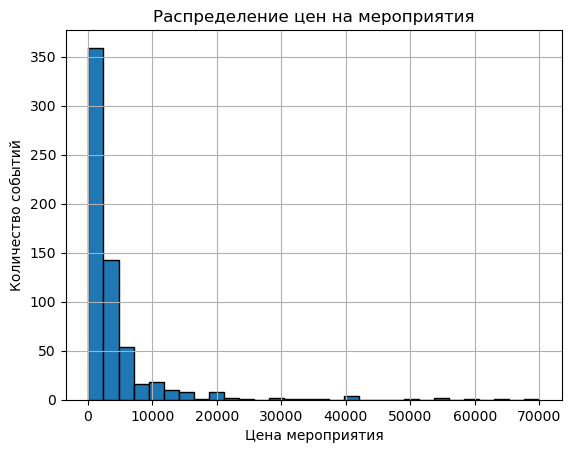

In [8]:
# Построим гистограмму стоимости мероприятия крупно
events['price'].hist(bins=30, edgecolor='black')
plt.xlabel('Цена мероприятия')
plt.ylabel('Количество событий')
plt.title('Распределение цен на мероприятия')
plt.show()

In [9]:
# Посмотрим размах цен
price_range = events['price'].max() - events['price'].min()
print(f"Размах цен: {price_range}")

Размах цен: 69901.0


In [10]:
# Значения основных характеристик
print(events['price'].describe())

count      634.000000
mean      4139.600946
std       7658.787134
min         99.000000
25%       1000.000000
50%       2000.000000
75%       3500.000000
max      70000.000000
Name: price, dtype: float64


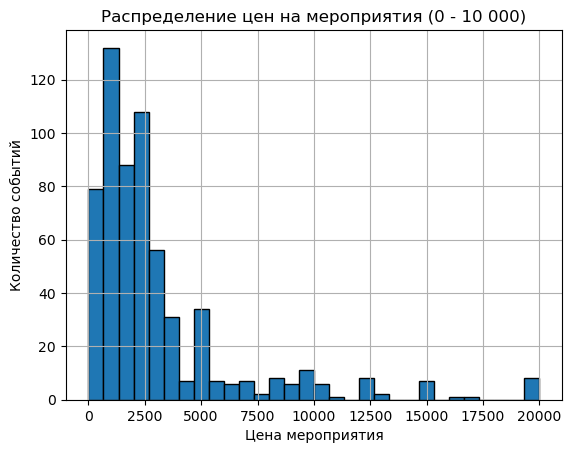

In [11]:
# Построим гистограмму только для стоимости от 0 до 20000
events['price'].hist(bins=30, range=(0, 20000), edgecolor='black')

plt.xlabel('Цена мероприятия')
plt.ylabel('Количество событий')
plt.title('Распределение цен на мероприятия (0 - 10 000)')
plt.show()

In [12]:
# Сформируем датафрейм с месячной выгодой
benefit_data = []

# Перебираем количество бронирований от 1 до 12
for visits in range(1, 13):  # От 1 до 12 посещений
    benefit_row = {}  # Создаём словарь для строки
    
    # Для каждой уменьшенной стоимости (уменьшаем на 300)
    for i in range(0, 20):  # 9 шагов (от 0 до 8)
        price_value = average_price - (i * 300)  # Уменьшаем цену на 300 на каждом шаге
        if price_value > 0:  # Если цена больше 0, считаем выгоду
            # Название колонки
            column_name = f'avg_{price_value}'
            # Вычисляем выгоду
            benefit = visits * price_value
            # Добавляем в словарь для этой строки
            benefit_row[column_name] = benefit
    
    # Добавляем строку с выгоду для определённого количества бронирований
    benefit_data.append(benefit_row)

# Преобразуем список в датафрейм с индексами от 1 до 12
benefit_month = pd.DataFrame(benefit_data, index=pd.RangeIndex(start=1, stop=13, step=1))

# Переименовываем индекс
benefit_month.index.name = "Кол-во бронирований в месяц"

# Получаем первую колонку (максимальная цена)
first_col_name = benefit_month.columns[0]

# Создаём многоуровневые заголовки
columns = pd.MultiIndex.from_tuples(
    [("Реальная стоимость", "real_price")] + 
    [("Экономия при другой средней стоимости", col) for col in benefit_month.columns if col != first_col_name]
)

# Переименовываем первую колонку и применяем многоуровневые заголовки
benefit_month.columns = columns
benefit_month.rename(columns={"Benefit_at_" + str(average_price): "real_price"}, level=1, inplace=True)
benefit_month

Реальная стоимость  \
                                    real_price   
Кол-во бронирований в месяц                      
1                                         4140   
2                                         8280   
3                                        12420   
4                                        16560   
5                                        20700   
6                                        24840   
7                                        28980   
8                                        33120   
9                                        37260   
10                                       41400   
11                                       45540   
12                                       49680   

                            Экономия при другой средней стоимости           \
                                                         avg_3840 avg_3540   
Кол-во бронирований в месяц                                                  
1                                                            3840     3540   
2                                                            7680     7080   
3                                                           11520    10620   
4                                                           15360    14160   
5                                                           19200    17700   
6                                                           23040    21240   
7                                                           26880    24780   
8                                                           30720    28320   
9                                                           34560    31860   
10                                                          38400    35400   
11                                                          42240    38940   
12                                                          46080    42480   

                                                                          \
                            avg_3240 avg_2940 avg_2640 avg_2340 avg_2040   
Кол-во бронирований в месяц                                                
1                               3240     2940     2640     2340     2040   
2                               6480     5880     5280     4680     4080   
3                               9720     8820     7920     7020     6120   
4                              12960    11760    10560     9360     8160   
5                              16200    14700    13200    11700    10200   
6                              19440    17640    15840    14040    12240   
7                              22680    20580    18480    16380    14280   
8                              25920    23520    21120    18720    16320   
9                              29160    26460    23760    21060    18360   
10                             32400    29400    26400    23400    20400   
11                             35640    32340    29040    25740    22440   
12                             38880    35280    31680    28080    24480   

                                                                                
                            avg_1740 avg_1440 avg_1140 avg_840 avg_540 avg_240  
Кол-во бронирований в месяц                                                     
1                               1740     1440     1140     840     540     240  
2                               3480     2880     2280    1680    1080     480  
3                               5220     4320     3420    2520    1620     720  
4                               6960     5760     4560    3360    2160     960  
5                               8700     7200     5700    4200    2700    1200  
6                              10440     8640     6840    5040    3240    1440  
7                              12180    10080     7980    5880    3780    1680  
8                              13920    11520     9120    6720    4320    1920  
9                              15660    12960    10260    7560    4860    

In [13]:
# Сформируем датафрейм с годовой выгодой
benefit_data = []

# Перебираем количество бронирований от 1 до 12
for visits in range(1, 13):  # От 1 до 12 посещений
    benefit_row = {}  # Создаём словарь для строки
    
    # Для каждой уменьшенной стоимости (уменьшаем на 300)
    for i in range(0, 20):  # 20 шагов
        price_value = average_price - (i * 200)  # Уменьшаем цену на 300 на каждом шаге
        if price_value > 0:  # Если цена больше 0, считаем выгоду
            # Название колонки
            column_name = f'avg_{price_value}'
            # Вычисляем выгоду за месяц
            benefit = visits * price_value
            # Вычисляем экономию за год
            annual_savings = benefit * 12
            # Добавляем в словарь для этой строки
            benefit_row[column_name] = annual_savings
    
    # Добавляем строку с экономией для определённого количества бронирований
    benefit_data.append(benefit_row)

# Преобразуем список в датафрейм с индексами от 1 до 12
benefit_year = pd.DataFrame(benefit_data, index=pd.RangeIndex(start=1, stop=13, step=1))

# Переименовываем индекс
benefit_year.index.name = "Кол-во бронирований в каждый месяц в течение года"

# Получаем первую колонку (максимальная цена)
first_col_name = benefit_year.columns[0]

# Создаём многоуровневые заголовки
columns = pd.MultiIndex.from_tuples(
    [("Реальная стоимость", "real_price")] + 
    [("Экономия при другой средней стоимости", col) for col in benefit_year.columns if col != first_col_name]
)

# Переименовываем первую колонку и применяем многоуровневые заголовки
benefit_year.columns = columns
benefit_year.rename(columns={"Benefit_at_" + str(average_price): "real_price"}, level=1, inplace=True)
benefit_year

Реальная стоимость  \
                                                          real_price   
Кол-во бронирований в каждый месяц в течение года                      
1                                                              49680   
2                                                              99360   
3                                                             149040   
4                                                             198720   
5                                                             248400   
6                                                             298080   
7                                                             347760   
8                                                             397440   
9                                                             447120   
10                                                            496800   
11                                                            546480   
12                                                            596160   

                                                  Экономия при другой средней стоимости  \
                                                                               avg_3940   
Кол-во бронирований в каждый месяц в течение года                                         
1                                                                                 47280   
2                                                                                 94560   
3                                                                                141840   
4                                                                                189120   
5                                                                                236400   
6                                                                                283680   
7                                                                                330960   
8                                                                                378240   
9                                                                                425520   
10                                                                               472800   
11                                                                               520080   
12                                                                               567360   

                                                                              \
                                                  avg_3740 avg_3540 avg_3340   
Кол-во бронирований в каждый месяц в течение года                              
1                                                    44880    42480    40080   
2                                                    89760    84960    80160   
3                                                   134640   127440   120240   
4                                                   179520   169920   160320   
5                                                   224400   212400   200400   
6                                                   269280   254880   240480   
7                                                   314160   297360   280560   
8                                                   359040   339840   320640   
9                                                   403920   382320   360720   
10                                                  448800   424800   400800   
11                                                  493680   467280   440880   
12                                                  538560   509760   480960   

                                                                              \
                                                  avg_3140 avg_2940 avg_2740   
Кол-во бронирований в каждый месяц в течение года                              
1                                                    37680    35280    32880   
2                                                    75360    70560    65760   
3 

In [14]:
# Сформируем файл и разместим информацию с датафреймов отдельно на каждом листе
file_path = r"C:\come_on_dude\come_on_dude\come_on_dude\come_on_dude.xls"

# Сохраняем в xls-файл с текстом перед таблицами
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    # Сформируем аннотацию к таблицам внутри файла
    workbook  = writer.book
    worksheet = workbook.add_worksheet('events')
    worksheet.write('A1', 'Список мероприятий')
    worksheet.write('A2', 'event_id — уникальный идентификатор мероприятия')  
    worksheet.write('A3', 'created_date — дата создания мероприятия')  
    worksheet.write('A4', 'name — название мероприятия')  
    worksheet.write('A5', 'price — стоимость мероприятия')
    worksheet.write('A6', 'direction — направления мероприятия')  
    events.to_excel(writer, sheet_name="events", startrow=7, index=False)

    worksheet = workbook.add_worksheet('benefit_month')
    worksheet.write('A1', 'Таблица с расчетом выгоды по карте в рамках месяца')
    worksheet.write('A2', 'real_prie — экономика при реальном значении средней стоимости мероприятия')
    worksheet.write('A3', 'avg_значение — расчетная экономика при возможном значнии средней стоимости мероприятия') 
    benefit_month.to_excel(writer, sheet_name="benefit_month", startrow=5)

    worksheet = workbook.add_worksheet('benefit_year')
    worksheet.write('A1', 'Таблица с расчетом выгоды по карте в рамках месяца')
    worksheet.write('A2', 'real_priсe — экономика при реальном значении средней стоимости мероприятия')
    worksheet.write('A3', 'avg_значение — расчетная экономика при возможном значнии средней стоимости мероприятия') 
    benefit_year.to_excel(writer, sheet_name="benefit_year", startrow=5)
    
print ("Файл сформирован")

Файл сформирован
